## Question-1
### Ingest and perform analytics over Yelp open dataset (Json format) from https://www.yelp.com/dataset to a data store (NoSQL or RDBMS) in your local laptop or Cloud. You may have troubles with the large data volume. 

In [2]:
import os
import pandas as pd
os.chdir('/Users/Diven/Desktop/SMU/Lift & CO/yelp_Dataset')

In [5]:
import sqlite3
import json
from datetime import datetime


sql_transaction = []
import pymysql.cursors
# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='Diven08*',
                             db='lift&co',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
                             

c = connection.cursor()

def transaction_bldr(query, data):
    global sql_transaction
    singleTransaction = (query, data)
    sql_transaction.append(singleTransaction)
    if len(sql_transaction) > 500:
        for s in sql_transaction:
            tempData = s[1]
            try:
                c.execute(s[0],tempData)
                
            except Exception as e:
                print(e)
                
        connection.commit()
        sql_transaction = []
        return 



def create_tables():
    c.execute("""CREATE TABLE IF NOT EXISTS reviews ( `review_id` VARCHAR(250) ,`user_id` VARCHAR(250), `business_id` VARCHAR(250), `text` TEXT, `date` VARCHAR(50) )""")
    c.execute("CREATE TABLE IF NOT EXISTS check_in(business_id VARCHAR(250) PRIMARY KEY, date LONGTEXT)")
    c.execute("""CREATE TABLE IF NOT EXISTS busines ( `business_id` VARCHAR(250) ,`name` VARCHAR(250), `city` VARCHAR(250), `state` VARCHAR(250), `review_count` int, `stars` int, `is_open` boolean, `attributes` TEXT, `categories` TEXT )""")
    c.execute("""CREATE TABLE IF NOT EXISTS users ( `user_id` VARCHAR(250) ,`since` VARCHAR(250), `useful` int, `review_count` int, `average_stars` int, `friends` TEXT, `fans` TEXT )""")
    c.execute("""CREATE TABLE IF NOT EXISTS photos ( `business_id` VARCHAR(250) ,`photo_id` VARCHAR(250),`caption` VARCHAR(250),`label` VARCHAR(25) )""")
    c.execute("""CREATE TABLE IF NOT EXISTS tip ( `user_id` VARCHAR(250) ,`business_id` VARCHAR(250) ,`text` TEXT, `date` VARCHAR(50), `compliment_count` int )""")
    
def sql_insert_row(table_name, data):
    insert_query = """INSERT INTO {} VALUES ( """.format(table_name)
    firstRecord = True
    for record in data:
        if not firstRecord:
            insert_query = insert_query + " , "
        insert_query = insert_query + "%s"
        firstRecord = False
    insert_query = insert_query + ");"
   # try:
    transaction_bldr(insert_query, data)

if __name__ == '__main__':
    create_tables()
    row_counter = 0
    tableDataMap = {

"check_in" : {
            "file" : "checkin.json",
            "columns" : ["business_id", "date"]
        },
"photos" : {
            "file" : "photo.json",
            "columns" : ["business_id", "photo_id", "caption", "label" ]
        },
"tip" : {
            "file" : "tip.json",
            "columns" : ["user_id", "business_id", "text", "date" ,"compliment_count"]
        },
"users" : {
            "file" : "user.json",
            "columns" : ["user_id", "since", "useful", "review_count", "average_stars", "frineds", "fans" ]
        },
"busines" : {
            "file" : "business.json",
            "columns" : ["business_id", "name", "city", "state", "review_count", "stars", "is_open", "attributes", "categories" ]
        },
"reviews" : {
            "file" : "review.json",
            "columns" : ["review_id","user_id", "business_id", "text", "date" ]
        }

    }
    for tableName, fileAndColumnMap in tableDataMap.items():
        with open(fileAndColumnMap.get("file"), buffering=1000) as f:
            for row in f:
                row_counter += 1
                row = json.loads(row)
                tempRowData = []
                for columnName in fileAndColumnMap.get("columns"):
                    try:
                        singleData = row[columnName]
                    except Exception as e:
                        singleData = ""


                    tempRowData.append(str(singleData))
                sql_insert_row(tableName, tempRowData)
                if row_counter % 10000 == 0:
                    print('Total Rows Read: {}, Time: {}'.format(row_counter, str(datetime.now())))
        print("done")
        connection.commit()
    c.close()

Total Rows Read: 10000, Time: 2019-11-02 15:35:19.131377
Total Rows Read: 20000, Time: 2019-11-02 15:35:24.262738
Total Rows Read: 30000, Time: 2019-11-02 15:35:31.300813
Total Rows Read: 40000, Time: 2019-11-02 15:35:36.996653
Total Rows Read: 50000, Time: 2019-11-02 15:35:43.353801
Total Rows Read: 60000, Time: 2019-11-02 15:35:50.159965
Total Rows Read: 70000, Time: 2019-11-02 15:35:56.571436
Total Rows Read: 80000, Time: 2019-11-02 15:36:02.878728
Total Rows Read: 90000, Time: 2019-11-02 15:36:08.247433
Total Rows Read: 100000, Time: 2019-11-02 15:36:13.568287
Total Rows Read: 110000, Time: 2019-11-02 15:36:19.504173
Total Rows Read: 120000, Time: 2019-11-02 15:36:25.603002
Total Rows Read: 130000, Time: 2019-11-02 15:36:31.719269
Total Rows Read: 140000, Time: 2019-11-02 15:36:38.306858
Total Rows Read: 150000, Time: 2019-11-02 15:36:43.619157
Total Rows Read: 160000, Time: 2019-11-02 15:36:48.779374
done
Total Rows Read: 170000, Time: 2019-11-02 15:36:52.910552
Total Rows Read: 1

Total Rows Read: 1420000, Time: 2019-11-02 15:45:25.239067
Total Rows Read: 1430000, Time: 2019-11-02 15:45:29.157156
Total Rows Read: 1440000, Time: 2019-11-02 15:45:33.081000
Total Rows Read: 1450000, Time: 2019-11-02 15:45:37.058048
Total Rows Read: 1460000, Time: 2019-11-02 15:45:41.011857
Total Rows Read: 1470000, Time: 2019-11-02 15:45:44.956599
Total Rows Read: 1480000, Time: 2019-11-02 15:45:48.890890
Total Rows Read: 1490000, Time: 2019-11-02 15:45:52.872084
Total Rows Read: 1500000, Time: 2019-11-02 15:45:56.826700
Total Rows Read: 1510000, Time: 2019-11-02 15:46:00.647668
Total Rows Read: 1520000, Time: 2019-11-02 15:46:04.699859
Total Rows Read: 1530000, Time: 2019-11-02 15:46:08.796517
Total Rows Read: 1540000, Time: 2019-11-02 15:46:12.832896
Total Rows Read: 1550000, Time: 2019-11-02 15:46:16.758576
Total Rows Read: 1560000, Time: 2019-11-02 15:46:20.795580
Total Rows Read: 1570000, Time: 2019-11-02 15:46:24.805324
Total Rows Read: 1580000, Time: 2019-11-02 15:46:28.7501

In [ ]:
#23 mins for first 5 tables
#50 mins for review table

## Question-2
### Top 10 restaurants in Toronto with the highest popularity. You are free to define your ‘popularity’, as long as it can convince people.

In [2]:
import os
import pandas as pd
os.chdir('/Users/Diven/Desktop/SMU/Lift & CO/yelp_Dataset')

In [2]:
#business_id,name,city,state,review_count,is_open
import json
import pandas as pd
import matplotlib.pyplot as plt


# open input file: 
ifile = open('checkin.json') 

stop = -1

all_data = list()
for i, line in enumerate(ifile):
    if i%100000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    business_id = data['business_id']
    date = data['date']

    counter = 0
    try:
        datelist = date.split(",")
        for d in datelist:
            d = d.replace(" ","")
            counter+=1
    except Exception as e:
        pass
    
    all_data.append([business_id,counter])
       

    
# create the DataFrame
check_in = pd.DataFrame(all_data, columns=['business_id','date'])

ifile.close()
#check_in.to_csv("check_in_count.csv",index=False)


0
100000


In [3]:
business = pd.read_csv("business.csv")
check_in = pd.read_csv("check_in_count.csv")

temp = business.merge(check_in, how='left')


In [4]:
#Filter out only Toronto
toronto = temp[business['city'] == "Toronto"]

#Sort by the count of dates
toronto = toronto.sort_values('date', ascending = False)

#Saivng it into csv
#toronto.to_csv("toronto-1.csv",index=False)

In [8]:
value = 10
toronto.sort_values(by = 'date', ascending = False)[:value]

business_id                          name     city state  \
49253  r_BrIgzYcwo1NAuG9dLbpg     Pai Northern Thai Kitchen  Toronto    ON   
9593   nT16Y6AsJDwEpUB1JICKzg            St Lawrence Market  Toronto    ON   
56542  trKyIRyjKqVSZmcU0AnICQ                   Pearl Diver  Toronto    ON   
28283  e41TP5cXZqSrz50xCBJqZw  Insomnia Restaurant & Lounge  Toronto    ON   
38605  N93EYZy9R0sdlEvubu94ig                  Banh Mi Boys  Toronto    ON   
69093  RtUvSWO_UZ8V3Wpj0n077w        KINKA IZAKAYA ORIGINAL  Toronto    ON   
41632  f5O7v_X_jCg2itqacRfxhg                Sansotei Ramen  Toronto    ON   
68180  -av1lZI1JDY_RZN2eTMnWg         Salad King Restaurant  Toronto    ON   
63110  aLcFhMe6DDJ430zelCpd2A                 Khao San Road  Toronto    ON   
65700  DE89UdHFMCN6DtYWZuer5A       Hokkaido Ramen Santouka  Toronto    ON   

       review_count  is_open  \
49253          2121        1   
9593            496        1   
56542           517        1   
28283           795        1   
38605          1045        1   
69093          1397        1   
41632           794        1   
68180           876        1   
63110          1410        1   
65700           750        1   

                                              categories   latitude  \
49253  Restaurants, Food, Thai, Ethnic Food, Specialt...  43.647866   
9593   Farmers Market, Restaurants, Grocery, Sandwich...  43.648730   
56542  Chinese, Steakhouses, Seafood, Breakfast & Bru...  43.651539   
28283  French, Bars, Caterers, Canadian (New), Breakf...  43.665131   
38605  Sandwiches, Restaurants, Asian Fusion, Food, D...  43.648827   
69093  Bars, Restaurants, Japanese, Tapas/Small Plate...  43.660430   
41632              Restaurants, Ramen, Japanese, Noodles  43.655004   
68180                                  Thai, Restaurants  43.657648   
63110                                  Thai, Restaurants  43.646411   
65700              Japanese, Restaurants, Noodles, Ramen  43.656322   

       longitude    date  
49253 -79.388642  2872.0  
9593  -79.371541  2221.0  
56542 -79.373760  2193.0  
28283 -79.410852  2173.0  
38605 -79.396970  1816.0  
69093 -79.378927  1723.0  
41632 -79.386473  1720.0  
68180 -79.381728  1714.0  
63110 -79.393480  1713.0  
65700 -79.377500  1707.0

## Question-3
### How many Canadian residents(figure out who are Canadian residents by yourself) reviewed the business “Mon Ami Gabi” in last 1 year?

In [1]:
import os
import pandas as pd
os.chdir('/Users/Diven/Desktop/SMU/Lift & CO/yelp_Dataset')

In [2]:
reviews = pd.read_csv("reviews.csv")
business = pd.read_csv("business.csv")

In [3]:
reviews.head()

Review_id                 User_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  IPw8yWiyqnfBzzWmypUHgg  5JVY32_bmTBfIGpCCsnAfw  Mem13A3C202RzT53npn4NA   
2  eed44nI0eZ4BGKtKXsRJhQ  tAcB1ZohRtjozsymvqqHzQ  m7ommfJFalI47UksyX04Iw   
3  E4LqIZ7DJd_R4ZHSNKx4RQ  DoRCeCcJbrsM2BiAKj3trA  SU56w479vUfFHsvmvQIf7A   
4  h7Rmb3EiXjajVfGYNa5CuQ  oAOE4UAC5ZbAjEGBEMCb4g  PycR_Mr5jA9jB4Xg3nX0Yw   

   stars                                               text  \
0    1.0  Total bill for this horrible service? Over $8G...   
1    5.0  If you are looking for the best pierogies in P...   
2    1.0  Met a friend for dinner there tonight. The ser...   
3    4.0  So good! They didn't make it to 5 stars due to...   
4    1.0  They charged me twice what I expected to pay. ...   

                  date  
0  2013-05-07 04:34:36  
1  2017-05-13 10:41:43  
2  2014-09-25 08:15:44  
3  2016-07-25 03:55:20  
4  2014-01-17 02:15:25

In [4]:
business.head()

business_id                         name                city  \
0  QXAEGFB4oINsVuTFxEYKFQ   Emerald Chinese Restaurant         Mississauga   
1  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant           Charlotte   
2  1Dfx3zM-rW4n-31KeC8sJg                    Taco Bell             Phoenix   
3  fweCYi8FmbJXHCqLnwuk8w                Marco's Pizza  Mentor-on-the-Lake   
4  -K4gAv8_vjx8-2BxkVeRkA                   Baby Cakes          Willoughby   

  state  review_count  is_open  \
0    ON           128        1   
1    NC           170        1   
2    AZ            18        1   
3    OH            16        1   
4    OH             7        1   

                                          categories   latitude   longitude  
0  Specialty Food, Restaurants, Dim Sum, Imported...  43.605499  -79.652289  
1                  Sushi Bars, Restaurants, Japanese  35.092564  -80.859132  
2  Restaurants, Breakfast & Brunch, Mexican, Taco...  33.495194 -112.028588  
3         Italian, Restaurants, Pizza, Chicken Wings  41.708520  -81.359556  
4                                     Bakeries, Food  41.639860  -81.406396

In [5]:
business[business['name'] == 'Mon Ami Gabi']


business_id          name       city state  review_count  \
31832  4JNXUYY8wbaaDmk3BPzlWw  Mon Ami Gabi  Las Vegas    NV          8348   

       is_open                                         categories   latitude  \
31832        1  Food, French, Breakfast & Brunch, Restaurants,...  36.112859   

        longitude  
31832 -115.172434

In [6]:
mon_ami_gabi = reviews[reviews['business_id'] == "4JNXUYY8wbaaDmk3BPzlWw"]
#mon_ami_gabi.to_csv("mon_ami_gabi.csv",index=False)

mon_ami_gabi

Review_id                 User_id  \
101093  BP-Ef0N-DwVzRLOhESrSkw  SIpBqzGhRM7T5cDFiuIryg   
101477  lV4-_fa-Xx8ar1Ke80m3Rg  0hMC8tPtc_K_ACAj7pss_Q   
101487  CgNoFiHxxZE8dn-vULYB9Q  HFECrzYDpgbS5EmTBtj2zQ   
101820  z_X2-0bK9K8dUpGHzgsHBg  gDXJ1ES0-IQ_6T7a7oOjwg   
101921  stKtPWHBi3UCaU88MBWdhQ  DlVTMl3ciFqguGb5hWjswg   
...                        ...                     ...   
123052  cmAWxw_cpORuHB9s3Qt2cw  DjiWvNLBbrOI5qKOyYGtCA   
123865  a9hEUNGI9A-hgZzki1U2ZA  41HLwXnR0Lm3NUp01cIOQg   
124679  pj40n3BEe5G7vo5pVocpgA  NE0Mx9NLNUi9eVUpM5v1Gw   
124722  HOrSUjqwQq0S1lgRN6rUKw  lxdiwASOCnvRFsogbEYh3A   
125201  2GKM7kS_JCazJeusbgu4lQ  JADdo9NEeO5Az9aOYbyvZA   

                   business_id  stars  \
101093  4JNXUYY8wbaaDmk3BPzlWw    5.0   
101477  4JNXUYY8wbaaDmk3BPzlWw    3.0   
101487  4JNXUYY8wbaaDmk3BPzlWw    4.0   
101820  4JNXUYY8wbaaDmk3BPzlWw    4.0   
101921  4JNXUYY8wbaaDmk3BPzlWw    4.0   
...                        ...    ...   
123052  4JNXUYY8wbaaDmk3BPzlWw    5.0   
123865  4JNXUYY8wbaaDmk3BPzlWw    3.0   
124679  4JNXUYY8wbaaDmk3BPzlWw    5.0   
124722  4JNXUYY8wbaaDmk3BPzlWw    4.0   
125201  4JNXUYY8wbaaDmk3BPzlWw    4.0   

                                                     text                 date  
101093  I finally ate here today!  For many years, I w...  2013-10-25 02:00:20  
101477  What I loved about this place is that, when I ...  2011-04-25 06:35:05  
101487  When I'm on a business trip, it's easier to ea...  2012-03-03 00:24:57  
101820  There's a nice evening breeze, you can hear An...  2013-02-23 09:36:48  
101921  Nice view, decent food (but can be hit or miss...  2014-04-03 10:24:30  
...                                                   ...                  ...  
123052  I am so happy i found got to try this amazing ...  2012-10-06 16:41:48  
123865  Food at Mon Ami Gabi is decent and the view to...  2011-03-15 07:58:48  
124679  Strolled in around 10 AM on a Sunday morning. ...  2014-09-23 22:23:30  
124722  This place started on the wrong foot, but once...  2016-10-24 07:39:49  
125201  ********************* 1301 *******************...  2015-05-11 01:36:12  

[98 rows x 6 columns]

In [7]:
mon_ami_gabi = pd.read_csv("mon_ami_gabi.csv")

In [8]:
print(min(mon_ami_gabi['date']))
print(max(mon_ami_gabi['date']))

2008-10-27 20:53:20
2018-10-09 02:01:48


In [9]:
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta
currTime = datetime.now()

#Set value of years
deltaDate = currTime - relativedelta(years=3)

dateb = str(deltaDate)

In [10]:
mon_ami_gabi_2018 = mon_ami_gabi[mon_ami_gabi['date'] > dateb]

In [11]:
print("Number of reviews:",len(mon_ami_gabi_2018))
print(min(mon_ami_gabi_2018['date']))
print(max(mon_ami_gabi_2018['date']))

Number of reviews: 26
2016-11-12 19:24:38
2018-10-09 02:01:48


In [12]:
mon_ami_gabi_2018

Review_id                 User_id             business_id  \
5   04CwiR2yH0w0GbqxDIkZsw  a2r5WiBx5hehodpEgIT3_A  4JNXUYY8wbaaDmk3BPzlWw   
8   eExq38cLw-c7C4_F3lwDlg  WP9NaEgjvpsjTtZESisRLA  4JNXUYY8wbaaDmk3BPzlWw   
12  NFfEEQHhX1ot9uwEwqDhuQ  61AymMi8D4RTQ2aa1w41ew  4JNXUYY8wbaaDmk3BPzlWw   
18  R3eGyKESUsz0frN0Yl4nxg  XMgSvrWrkuVRua-M2XPRqg  4JNXUYY8wbaaDmk3BPzlWw   
25  ZVozR2EqKhZSlgSYhA8i3g  jnKAhw3A9ASM3Nn9wXdA6A  4JNXUYY8wbaaDmk3BPzlWw   
38  JX2Hmwv7bLpGpbn_iyTDTA  NhgU7RhuYYFmpkb1jlYJ6Q  4JNXUYY8wbaaDmk3BPzlWw   
42  UG20AeOKIV-_eQj2y72wXA  D9ATcRG8pld4ZQXVW6SG0g  4JNXUYY8wbaaDmk3BPzlWw   
45  WO6Tp5d8eI09GI49luPZyg  YMYb73K3Dv3oiac4mADJSg  4JNXUYY8wbaaDmk3BPzlWw   
46  Qzb7taWccqobs0pXWb5wfA  xSmJ4WZCxnLePHIM95ZhcQ  4JNXUYY8wbaaDmk3BPzlWw   
50  P7b_LWkgRsUKLDl82swv_w  -RApyq06DMBii7ovXtQnfw  4JNXUYY8wbaaDmk3BPzlWw   
54  nQ9n4vOA8kR-yDxW2LCCJg  1JlOo8MoX4e67l34aRulrg  4JNXUYY8wbaaDmk3BPzlWw   
55  YeEvCy8Bfi5TIwrK6RJuSQ  PcvbBOCOcs6_suRDH7TSTg  4JNXUYY8wbaaDmk3BPzlWw   
56  EP7SXxSY0jlaUWt_0qtY6A  caICV2psm7OABEkikMx2vw  4JNXUYY8wbaaDmk3BPzlWw   
58  2r5Dv1NOmy6SKIoafXGJ0w  lUPSEbFRd3jDOM5agGnjWQ  4JNXUYY8wbaaDmk3BPzlWw   
61  O2ermwveDHF59wkvwjSjDw  YWB5HV5VFWXz4TOYBMmiEg  4JNXUYY8wbaaDmk3BPzlWw   
64  pEi8kFEoyc0cShdf_nBq4w  1JlOo8MoX4e67l34aRulrg  4JNXUYY8wbaaDmk3BPzlWw   
69  Kdl7kCMzTZFEgjB0oxF1cA  4Mw__5UeTEW5L1B7nriYqw  4JNXUYY8wbaaDmk3BPzlWw   
72  FRwoGxYf8tjr4voq9qpgZw  29yBaTFMSh-l6wNwy9d_mA  4JNXUYY8wbaaDmk3BPzlWw   
75  jYS3OwudCpPun0tLf_bLlg  Tm5xbdgmL788Lz2PEFYEOA  4JNXUYY8wbaaDmk3BPzlWw   
78  GqRV17oRqoxFnxPUpRZoPA  bMVvGpsJ8Gd2ZgEB7cRsAg  4JNXUYY8wbaaDmk3BPzlWw   
79  LvePsBhVk0ptt6nIxWWBWw  L6nrDwHJDyV0KThjON-Kog  4JNXUYY8wbaaDmk3BPzlWw   
82  3ACzOsvUKiL56HVVxHp9VA  cg5cRPKg13i4DJmBEFdqMg  4JNXUYY8wbaaDmk3BPzlWw   
84  0Z9_wshmaYqMvXo0kw9K9g  ZRZCGSbYFKJj_16gA7d-Nw  4JNXUYY8wbaaDmk3BPzlWw   
88  lV9LSy8gm7XTa6_W5oh2kA  zwLq4aVDSH7HyMbVjKfkRg  4JNXUYY8wbaaDmk3BPzlWw   
89  40fX_7RGH6DbqrhqrAlnDQ  keBv05MsMFBd0Hu98vXThQ  4JNXUYY8wbaaDmk3BPzlWw   
91  xKg8NxFrmXlMEEBzmxDHMQ  Db80SCez0BdYaHdC0xmzoQ  4JNXUYY8wbaaDmk3BPzlWw   

    stars                                               text  \
5     5.0  After about EIGHT visits, this deserves a FIVE...   
8     5.0  Redemption.\nBrunch at Mon Ami Gabi.\nWe had a...   
12    4.0  Great service and food. There is tons to choos...   
18    5.0  Thought we'd try their brunch as we always eat...   
25    5.0  This was the best restaurant we ate at while i...   
38    4.0  Collectively, all of my visits here have been ...   
42    4.0  I came here on my birthday and ordered the esc...   
45    5.0  Perfect, again.\n\nCame back here with friends...   
46    4.0  Here's a great place you will actually get exc...   
50    4.0  One of the places I recommend for first timers...   
54    5.0  Last visit to Las Vegas I waa recommended to g...   
55    3.0  Awesome ambience. Perfect views of the strip. ...   
56    5.0  One of the best steaks I've ever had. The bone...   
58    4.0  One of the most reviewed places in Las Vegas, ...   
61    3.0  This is one of my favorite spots in Las Vegas ...   
64    5.0  Last visit to Las Vegas I was recommended to g...   
69    5.0  I loved this place!! Considering that it is lo...   
72    3.0  Been here a couple of times for either my own ...   
75    5.0  Mon Ami Gabi is one of my favorite restaurants...   
78    4.0  Feelin' French. \n\nOrdered:\n- Banana Waffle ...   
79    4.0  Mon Ami Gabi has a fabulous location on the st...   
82    1.0  A group of girls and I came here for breakfast...   
84    5.0  Decided to come here for a late lunch. There w...   
88    1.0  I had high hopes of enjoying the 22oz Bone Rib...   
89    5.0  Such a great restaurant located right in the h...   
91    5.0  Happy Anniversary to us! We loved our brunch s...   

                   date  
5   2018-08-05 19:06:21  
8   2018-08-15 16:36:06  
12  2018-05-20 13:57:38  
18  2016-11-12 19:24:38  
25  2017-03-07 17:23:21  
38  2017-10-15 21:45:59  

## FInding Canadian Customers

In [13]:
t_review = pd.read_csv("reviews.csv")
t_business = pd.read_csv("business.csv")

In [14]:
t_review_merge = t_review.merge(t_business, how='left')
t_review_merge

Review_id                 User_id  \
0       Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA   
1       IPw8yWiyqnfBzzWmypUHgg  5JVY32_bmTBfIGpCCsnAfw   
2       eed44nI0eZ4BGKtKXsRJhQ  tAcB1ZohRtjozsymvqqHzQ   
3       E4LqIZ7DJd_R4ZHSNKx4RQ  DoRCeCcJbrsM2BiAKj3trA   
4       h7Rmb3EiXjajVfGYNa5CuQ  oAOE4UAC5ZbAjEGBEMCb4g   
...                        ...                     ...   
248428  gupUBwWRb13IvQhlKd6wdg  KodWdOaE1D4TloVSK0rXpg   
248429  828Gi_ZVcfO7-PR84DZZOw  PMttXkZ0XQwrUyUyjRtvzQ   
248430  NLhVwKW2uNgK4GZrDiaQug  73102fWuyLRHVWLK6_UqrQ   
248431  _VWXElLV_nzUQnkddLMc8g  5FAD2Yq7DLBQ_-ef1iDA-A   
248432  jPCXuSBbI_cPocgoNBhdkg  V6BjjQICDO4q7TT3ZhaPWw   

                   business_id  stars  \
0       ujmEBvifdJM6h6RLv4wQIg    1.0   
1       Mem13A3C202RzT53npn4NA    5.0   
2       m7ommfJFalI47UksyX04Iw    1.0   
3       SU56w479vUfFHsvmvQIf7A    4.0   
4       PycR_Mr5jA9jB4Xg3nX0Yw    1.0   
...                        ...    ...   
248428  cZahCTPCJdorOWB6R7EgiA    5.0   
248429  t8L09GiwLH3cuJPQjPzZaA    5.0   
248430  T-eEjmbEeQ53ezioW_9vxQ    1.0   
248431  ndTgznMYNe0n26VqzecEKQ    5.0   
248432  yA6dKNm_zl1ucZCnwW8ZCg    1.0   

                                                     text  \
0       Total bill for this horrible service? Over $8G...   
1       If you are looking for the best pierogies in P...   
2       Met a friend for dinner there tonight. The ser...   
3       So good! They didn't make it to 5 stars due to...   
4       They charged me twice what I expected to pay. ...   
...                                                   ...   
248428  We had great experience with quest limos this ...   
248429  The best school for dealer training around. Pr...   
248430  Was insulted after enjoying a meal with my wif...   
248431  I needed an older sectional cleaned and yelp s...   
248432  I think this owner and the owner of Amy's Baki...   

                       date                        name          city state  \
0       2013-05-07 04:34:36                         NaN           NaN   NaN   
1       2017-05-13 10:41:43              Pierogies Plus  McKees Rocks    PA   
2       2014-09-25 08:15:44                The Palomino       Calgary    AB   
3       2016-07-25 03:55:20                  India Oven     Las Vegas    NV   
4       2014-01-17 02:15:25                         NaN           NaN   NaN   
...                     ...                         ...           ...   ...   
248428  2014-04-20 06:09:46                         NaN           NaN   NaN   
248429  2018-09-13 00:51:44                         NaN           NaN   NaN   
248430  2015-04-07 17:57:29  Phil's Italian Steak House     Las Vegas    NV   
248431  2018-07-22 04:17:34                         NaN           NaN   NaN   
248432  2013-05-22 15:32:08              Italian Grotto    Scottsdale    AZ   

        review_count  is_open  \
0                NaN      NaN   
1               74.0      1.0   
2              112.0      1.0   
3              133.0      0.0   
4                NaN      NaN   
...              ...      ...   
248428           NaN      NaN   
248429           NaN      NaN   
248430         160.0      1.0   
248431           NaN      NaN   
248432         587.0      1.0   

                                               categories   latitude  \
0                                                     NaN        NaN   
1       Caterers, Polish, Event Planning & Services, R...  40.468871   
2       Restaurants, Music Venues, Arts & Entertainmen...  51.046466   
3                          Restaurants, Indian, Pakistani  36.144700   
4                                                     NaN        NaN   
...                                                   ...        ...   
248428                                                NaN        NaN   
248429                                                NaN        NaN   
248430  Nightlife, Hotels & Travel, Restaurants, Arts ...  36.124571   
248431                          

In [15]:
#count of every user in t_review_merge

temp = t_review_merge.groupby(['User_id']).count()

temp['User'] = temp.index
#temp=pd.read_csv("count_of_reviews_all.csv")
temp

Review_id  business_id  stars  text  date  name  city  \
User_id                                                                         
---1lKK3aKOuomHnwAkAow         14           14     14    14    14     4     4   
--4rAAfZnEIAKJE80aIiYg          1            1      1     1     1     1     1   
--5XzJ2pRsVVJiJUfzZlgQ          1            1      1     1     1     0     0   
--7gjElmOrthETJ8XqzMBw          1            1      1     1     1     1     1   
--Nnm_506G_p8MxAOQna5w          1            1      1     1     1     0     0   
...                           ...          ...    ...   ...   ...   ...   ...   
zzjKekzQ6i4iR-qpo405Pw          1            1      1     1     1     0     0   
zzjQuRnY_Kgr_zaw6A-ACQ          1            1      1     1     1     0     0   
zzo--VpSQh8PpsGVeMC1dQ          9            9      9     9     9     8     8   
zzqId9CnVHluOd38D1jGLA          1            1      1     1     1     1     1   
zzw0Z6-_VDp9ShIRSKIsQw          1            1      1     1     1     1     1   

                        state  review_count  is_open  categories  latitude  \
User_id                                                                      
---1lKK3aKOuomHnwAkAow      4             4        4           4         4   
--4rAAfZnEIAKJE80aIiYg      1             1        1           1         1   
--5XzJ2pRsVVJiJUfzZlgQ      0             0        0           0         0   
--7gjElmOrthETJ8XqzMBw      1             1        1           1         1   
--Nnm_506G_p8MxAOQna5w      0             0        0           0         0   
...                       ...           ...      ...         ...       ...   
zzjKekzQ6i4iR-qpo405Pw      0             0        0           0         0   
zzjQuRnY_Kgr_zaw6A-ACQ      0             0        0           0         0   
zzo--VpSQh8PpsGVeMC1dQ      8             8        8           8         8   
zzqId9CnVHluOd38D1jGLA      1             1        1           1         1   
zzw0Z6-_VDp9ShIRSKIsQw      1             1        1           1         1   

                        longitude                    User  
User_id                                                    
---1lKK3aKOuomHnwAkAow          4  ---1lKK3aKOuomHnwAkAow  
--4rAAfZnEIAKJE80aIiYg          1  --4rAAfZnEIAKJE80aIiYg  
--5XzJ2pRsVVJiJUfzZlgQ          0  --5XzJ2pRsVVJiJUfzZlgQ  
--7gjElmOrthETJ8XqzMBw          1  --7gjElmOrthETJ8XqzMBw  
--Nnm_506G_p8MxAOQna5w          0  --Nnm_506G_p8MxAOQna5w  
...                           ...                     ...  
zzjKekzQ6i4iR-qpo405Pw          0  zzjKekzQ6i4iR-qpo405Pw  
zzjQuRnY_Kgr_zaw6A-ACQ          0  zzjQuRnY_Kgr_zaw6A-ACQ  
zzo--VpSQh8PpsGVeMC1dQ          8  zzo--VpSQh8PpsGVeMC1dQ  
zzqId9CnVHluOd38D1jGLA          1  zzqId9CnVHluOd38D1jGLA  
zzw0Z6-_VDp9ShIRSKIsQw          1  zzw0Z6-_VDp9ShIRSKIsQw  

[117175 rows x 14 columns]

In [16]:
#Canada States
states = ["AB", "BC", "MB", "NB", "NL", "NT", "NS", "NU", "ON", "PE", "QC", 
          "SK", "YT"]

#Filtering out the data of Canada from the main merged table
canada=t_review_merge.loc[t_review_merge['state'].isin(states)]

#Getting the count of total number of reviews of every user who reviewd any Canadian Restaurant
canada = canada.groupby(['User_id']).count()
canada['User'] = canada.index
print("There are {} number of users who have reviewd Canadian Restaurant:".format(len(canada)))

#canada.to_csv("count_of_reviews_canada.csv",index=True)
#canada=pd.read_csv("count_of_reviews_all.csv")
canada

There are 8296 number of users who have reviewd Canadian Restaurant:


Review_id  business_id  stars  text  date  name  city  \
User_id                                                                         
--7gjElmOrthETJ8XqzMBw          1            1      1     1     1     1     1   
--Qh8yKWAvIP4V4K8ZPfHA         10           10     10    10    10    10    10   
--YhjyV-ce1nFLYxP49C5A          1            1      1     1     1     1     1   
-06AUDaZG_VaSVugGvPd0A          1            1      1     1     1     1     1   
-0SqALqeWmInVftG_iHcHg          1            1      1     1     1     1     1   
...                           ...          ...    ...   ...   ...   ...   ...   
zwmThlRiY1LHfJ_7zNfGqg          1            1      1     1     1     1     1   
zwwJklnKoi_tPG5V7MNk0w          1            1      1     1     1     1     1   
zyeSJYZ1TDzRe2YLefcwMQ          1            1      1     1     1     1     1   
zzo--VpSQh8PpsGVeMC1dQ          7            7      7     7     7     7     7   
zzqId9CnVHluOd38D1jGLA          1            1      1     1     1     1     1   

                        state  review_count  is_open  categories  latitude  \
User_id                                                                      
--7gjElmOrthETJ8XqzMBw      1             1        1           1         1   
--Qh8yKWAvIP4V4K8ZPfHA     10            10       10          10        10   
--YhjyV-ce1nFLYxP49C5A      1             1        1           1         1   
-06AUDaZG_VaSVugGvPd0A      1             1        1           1         1   
-0SqALqeWmInVftG_iHcHg      1             1        1           1         1   
...                       ...           ...      ...         ...       ...   
zwmThlRiY1LHfJ_7zNfGqg      1             1        1           1         1   
zwwJklnKoi_tPG5V7MNk0w      1             1        1           1         1   
zyeSJYZ1TDzRe2YLefcwMQ      1             1        1           1         1   
zzo--VpSQh8PpsGVeMC1dQ      7             7        7           7         7   
zzqId9CnVHluOd38D1jGLA      1             1        1           1         1   

                        longitude                    User  
User_id                                                    
--7gjElmOrthETJ8XqzMBw          1  --7gjElmOrthETJ8XqzMBw  
--Qh8yKWAvIP4V4K8ZPfHA         10  --Qh8yKWAvIP4V4K8ZPfHA  
--YhjyV-ce1nFLYxP49C5A          1  --YhjyV-ce1nFLYxP49C5A  
-06AUDaZG_VaSVugGvPd0A          1  -06AUDaZG_VaSVugGvPd0A  
-0SqALqeWmInVftG_iHcHg          1  -0SqALqeWmInVftG_iHcHg  
...                           ...                     ...  
zwmThlRiY1LHfJ_7zNfGqg          1  zwmThlRiY1LHfJ_7zNfGqg  
zwwJklnKoi_tPG5V7MNk0w          1  zwwJklnKoi_tPG5V7MNk0w  
zyeSJYZ1TDzRe2YLefcwMQ          1  zyeSJYZ1TDzRe2YLefcwMQ  
zzo--VpSQh8PpsGVeMC1dQ          7  zzo--VpSQh8PpsGVeMC1dQ  
zzqId9CnVHluOd38D1jGLA          1  zzqId9CnVHluOd38D1jGLA  

[8296 rows x 14 columns]

In [17]:
all =  pd.read_csv("count_of_reviews_all.csv")
canada = pd.read_csv("count_of_reviews_canada.csv")

In [18]:
temp = pd.merge(all, canada, how='inner', on=['User_id'])

In [19]:
temp = temp[['User_id','Review_id_x','Review_id_y']]
temp.columns = ['User_id','all','canada']
temp

User_id  all  canada
0     --7gjElmOrthETJ8XqzMBw    1       1
1     --Qh8yKWAvIP4V4K8ZPfHA   21      10
2     --YhjyV-ce1nFLYxP49C5A    1       1
3     -06AUDaZG_VaSVugGvPd0A    1       1
4     -0SqALqeWmInVftG_iHcHg    3       1
...                      ...  ...     ...
8291  zwmThlRiY1LHfJ_7zNfGqg    1       1
8292  zwwJklnKoi_tPG5V7MNk0w    1       1
8293  zyeSJYZ1TDzRe2YLefcwMQ    1       1
8294  zzo--VpSQh8PpsGVeMC1dQ    9       7
8295  zzqId9CnVHluOd38D1jGLA    1       1

[8296 rows x 3 columns]

In [20]:
temp['canada_per'] = temp['canada'] / temp['all'] *100
temp

User_id  all  canada  canada_per
0     --7gjElmOrthETJ8XqzMBw    1       1  100.000000
1     --Qh8yKWAvIP4V4K8ZPfHA   21      10   47.619048
2     --YhjyV-ce1nFLYxP49C5A    1       1  100.000000
3     -06AUDaZG_VaSVugGvPd0A    1       1  100.000000
4     -0SqALqeWmInVftG_iHcHg    3       1   33.333333
...                      ...  ...     ...         ...
8291  zwmThlRiY1LHfJ_7zNfGqg    1       1  100.000000
8292  zwwJklnKoi_tPG5V7MNk0w    1       1  100.000000
8293  zyeSJYZ1TDzRe2YLefcwMQ    1       1  100.000000
8294  zzo--VpSQh8PpsGVeMC1dQ    9       7   77.777778
8295  zzqId9CnVHluOd38D1jGLA    1       1  100.000000

[8296 rows x 4 columns]

In [21]:
min_reviews = 5
cut_off = 75

In [22]:
x = temp[temp['canada'] > min_reviews]
x.sort_values(by = 'canada')

User_id  all  canada  canada_per
6652  nOSWGrjT4HIpDohLAOpgLw    7       6   85.714286
6125  jDzGfjwSYZZsQ7nNNnzJ3Q   10       6   60.000000
6179  jfUTkA8sIhiw5ahn9-9HPg    9       6   66.666667
6191  jn5mjTce7_zDYNiGL5ojTA    8       6   75.000000
2229  FmfXYGze3qpuSU-wj4rK5w    7       6   85.714286
...                      ...  ...     ...         ...
3281  O3q-nwYZykMmacxjru01Zg  145     129   88.965517
1112  7Ri5xkuj6rMvD8F2zjWFow  145     134   92.413793
4389  Wc5L6iuvSNF5WGBlqIO8nw  371     277   74.663073
3553  Q9mA60HnY87C1TW5kjAZ6Q  509     341   66.994106
1865  CxDOIDnH8gp9KXzpBHJYXw  764     616   80.628272

[582 rows x 4 columns]

In [23]:
y = x[x['canada_per'] > cut_off]
y.sort_values(by = 'canada_per', ascending=False)

User_id  all  canada  canada_per
2388  GqLTKz0YsSkX-DTc9oHrBg   16      16  100.000000
6812  oW9PoxLCSMwZ6EEjKuPNjw    8       8  100.000000
2910  L1xB30wQZaMWdCR9M87lUA    7       7  100.000000
6452  lstlOQgPI-HEmvf85yAA5A    7       7  100.000000
6456  ludl6VlDreQcK4ZgOxo5Sg    6       6  100.000000
...                      ...  ...     ...         ...
7403  t2O6rs4fZeY9o6ZY52RyJA   21      16   76.190476
1900  DBHCFW3mSmmOEpONHVu1rQ   25      19   76.000000
3753  ReDypdRmVA3wc-QG8HBKkQ   37      28   75.675676
4076  U95wccXN_J8JwA5Ktlu8tw   41      31   75.609756
1635  BGzavA_ddMr-jGmhArv7fg   94      71   75.531915

[315 rows x 4 columns]

In [24]:
len(y) / len(temp) *100

3.7970106075216976

In [14]:
#y.to_csv("canadian_users.csv", index = False)

In [25]:
canadian_users = pd.read_csv("canadian_users.csv")
canadian_users

User_id  all  canada  canada_per
0    -UgKXdXQPjfltffd2e5SPQ    9       8   88.888889
1    -m0KTRk0c901-4b-BN34Gg    9       8   88.888889
2    0IwZb1ePNpSVYcCdMtGoQw   78      78  100.000000
3    0J9mtVJ4_QGsXYVK8qJzOQ   50      42   84.000000
4    0Se8OFrPpi6wE2TY2IVTLA   13      13  100.000000
..                      ...  ...     ...         ...
310  zLuX_g-whSejuUGTKW8PTw   12      12  100.000000
311  zPadAb9MnwcSHiwcUtAlIg    6       6  100.000000
312  zRMYkKuolr9hgaYixFm1NA    7       7  100.000000
313  zopuXHE12sjKeSukIv6Axg   27      25   92.592593
314  zzo--VpSQh8PpsGVeMC1dQ    9       7   77.777778

[315 rows x 4 columns]

In [26]:
canadian_mon_ami_gabi = pd.merge(mon_ami_gabi_2018, canadian_users, how='inner', on=['User_id'])

In [30]:
len(canadian_mon_ami_gabi)

0

In [29]:
#cross-check
"""
for x in mon_ami_gabi_2018['User_id']:
    if(x in list(canadian_users['User_id'])):
        print("true")
    else:
        print("False")
"""

## Qusetion-4
### Top 10 most common words in the reviews of the business “Chipotle Mexican Grill” might be helpful and interesting to the business.

In [3]:
import os
import pandas as pd
import nltk
pd.options.display.max_colwidth = 50

In [4]:
os.chdir('/Users/Diven/Desktop/SMU/Lift & CO/yelp_dataset')

In [5]:
df=pd.read_csv('business.csv')

In [6]:
df.head()

business_id                         name                city  \
0  QXAEGFB4oINsVuTFxEYKFQ   Emerald Chinese Restaurant         Mississauga   
1  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant           Charlotte   
2  1Dfx3zM-rW4n-31KeC8sJg                    Taco Bell             Phoenix   
3  fweCYi8FmbJXHCqLnwuk8w                Marco's Pizza  Mentor-on-the-Lake   
4  -K4gAv8_vjx8-2BxkVeRkA                   Baby Cakes          Willoughby   

  state  review_count  is_open  \
0    ON           128        1   
1    NC           170        1   
2    AZ            18        1   
3    OH            16        1   
4    OH             7        1   

                                          categories   latitude   longitude  
0  Specialty Food, Restaurants, Dim Sum, Imported...  43.605499  -79.652289  
1                  Sushi Bars, Restaurants, Japanese  35.092564  -80.859132  
2  Restaurants, Breakfast & Brunch, Mexican, Taco...  33.495194 -112.028588  
3         Italian, Restaurants, Pizza, Chicken Wings  41.708520  -81.359556  
4                                     Bakeries, Food  41.639860  -81.406396

In [7]:
cmg = df[df['name']=='Chipotle Mexican Grill']

In [8]:
cmg.count()

business_id     183
name            183
city            183
state           183
review_count    183
is_open         183
categories      183
latitude        183
longitude       183
dtype: int64

In [9]:
cmg.head()

business_id                    name        city state  \
214   dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill   Las Vegas    NV   
650   _EVOLAjWYEfSOO_smbBxaA  Chipotle Mexican Grill     Wexford    PA   
853   0rN_o7_IfshAHQwzMUK8nA  Chipotle Mexican Grill       Solon    OH   
1337  8Rydf8hXleCwbCN9nvmZ4Q  Chipotle Mexican Grill     Madison    WI   
1441  VFv7NcPW9ajUTLleJ8wOQA  Chipotle Mexican Grill  Pittsburgh    PA   

      review_count  is_open                       categories   latitude  \
214            115        1  Fast Food, Mexican, Restaurants  36.120095   
650             19        1  Restaurants, Mexican, Fast Food  40.623071   
853             57        1  Restaurants, Mexican, Fast Food  41.385342   
1337            41        1  Fast Food, Restaurants, Mexican  43.075147   
1441            65        1  Mexican, Fast Food, Restaurants  40.441062   

       longitude  
214  -115.171769  
650   -80.054498  
853   -81.440624  
1337  -89.396568  
1441  -79.957998

In [10]:
id = list(cmg['business_id'])

In [11]:
id

['dusNIzdCaH6EoLl2hRy6cQ',
 '_EVOLAjWYEfSOO_smbBxaA',
 '0rN_o7_IfshAHQwzMUK8nA',
 '8Rydf8hXleCwbCN9nvmZ4Q',
 'VFv7NcPW9ajUTLleJ8wOQA',
 'NbkDsQhfK13ATV79TI4OQg',
 'Nb3hAuv8OkpFgSImYdt3Rg',
 'A8MmwHrMI0WnRTyQMdf8aQ',
 'EozEGL29WftitEANtx3vaw',
 'HPngBhTmMOXbQI9Noppeaw',
 'AUl6myFhTAbEqt0GMdKHiw',
 '426RL7G7oTyu-f8jFxVRJQ',
 'T1lOHMIas_PSflKY7duF_g',
 'qUqmTlchliF55jF7s4Xlmw',
 'DG8KlNP7ArYesQb2AGUHng',
 'zMPfZdODe82SL_zxnv7asg',
 '3btAvuu-3hjq9UUa5FO-9Q',
 'Gl01qPpjC9DKN_Py3IEnpA',
 '4w3CXzYFboPjsjDHIXyVLg',
 'wy6pYrWtiGrktOpUmsvCHQ',
 'wAXYLmHuysYTz8i4VPKmaQ',
 'xsdRrNJuNumvrwoQ2Tt8tQ',
 'QnCsCbE7EQte_MDWLO1gYg',
 'KiTHWMK20GvgPvpHSzTHTg',
 'pIhteCW9zwjWzemoJwm4lw',
 '1D-7VH5nJdgjdjK5RAO28Q',
 '9qqhdkN4aeE6yvUiKg4F0Q',
 'kOmz-QnNWTZJMws-qH3eEw',
 'POIowl4F1ZiHdKLnx__ulw',
 'nEIWxj6m1gGWe1gi596Zvg',
 'sNAU_ItzmB-TIgmWwqRlEw',
 '-FNquqGseSCVMWo7KbK-Tg',
 'TTnUoYDCQoTfldLs3AuTDg',
 '-QC71Wuh0TyJI0RAZ3d0Iw',
 'Ks9nrEuLdjmrLH9uXz_G8A',
 '-FyfimfMvvOcMT7Cr4q2Aw',
 'WYDjn71X5xiEdpLxlT12hQ',
 

In [12]:
reviews = pd.read_csv('reviews.csv')

In [13]:
cmg_reviews = reviews[reviews['business_id'].isin(id)]
pd.options.display.max_colwidth = 50
cmg_reviews.head()

Review_id                 User_id             business_id  \
160   rCE67-CtkGecfutuJ0z3RQ  HQnfONrTQKBdHPV7iebtxQ  dusNIzdCaH6EoLl2hRy6cQ   
1967  yKDVkSQdQzhI1Zxj5Zlruw  UYcmGbelzRa0Q6JqzLoguw  AUl6myFhTAbEqt0GMdKHiw   
2854  KNVPNEIF-uMWp4lbzf8vIw  wm61ALFiZ-7BCbX57evHPw  8Rydf8hXleCwbCN9nvmZ4Q   
3744  t2xl5KzOI0gVN8iUbw1HhQ  blMu35dRLe2rCYIrM16wAw  0rN_o7_IfshAHQwzMUK8nA   
7095  ghgRS0wQuKoq_4ECzvbW9g  rMsB82tk9uOB6JumPMgczg  DG8KlNP7ArYesQb2AGUHng   

      stars                                               text  \
160     1.0  This is seriously the WORST chipotle I have ev...   
1967    4.0  This is a typical Chipotle location. Service i...   
2854    3.0  Chipotle gets a 'fast food' 3 stars from me. I...   
3744    1.0  This is the Chipotle I run to from time to tim...   
7095    4.0  Location, location, location.\n\nThis Chipotle...   

                     date  
160   2017-05-13 11:25:44  
1967  2015-07-04 06:34:04  
2854  2017-05-02 17:08:01  
3744  2014-08-25 19:34:47  
7095  2007-08-03 05:23:50

In [14]:
cmg_reviews.count()

Review_id      160
User_id        160
business_id    160
stars          160
text           160
date           160
dtype: int64

In [15]:
cmg_reviews['text'].iloc[1]

'This is a typical Chipotle location. Service is attentive and efficient. The line moves swiftly even when they are crowded.'

In [16]:
pd.options.display.max_colwidth = 100000
cmg_reviews = str(cmg_reviews['text'])

In [17]:
cmg_reviews

'160                  This is seriously the WORST chipotle I have ever been to and I have been coming here for years. \\n\\nThere must be new management or the staff that was working on my most recent visit were just plain stingy. One of my favorite parts about ordering at Chipotle is that -duh- adding extra items onto your plate IS FREE (except for meat and guac.) So PLEASE do explain how it is that you think it is okay not to provide guests with extra ingredients when this is a standard courtesy throughout the other locations. \\n\\nSay hello to the SMALLEST and stingiest plate of food I have ever ordered. I am honestly so shocked that they had the audacity to try and charge people for that. \\n\\nWhile this location is nestled with Panda Express and McDonald\'s between Harrah\'s and the Venetian, you\'d do much better to walk a couple blocks down to another location because this place is T R A S H.\n1967                                                                                

### to_lower

In [18]:
import nltk
def to_lower(text):
    return ' '.join([w.lower() for w in nltk.word_tokenize(text)])

In [19]:
lower = to_lower(cmg_reviews)
lower

"160 this is seriously the worst chipotle i have ever been to and i have been coming here for years . \\n\\nthere must be new management or the staff that was working on my most recent visit were just plain stingy . one of my favorite parts about ordering at chipotle is that -duh- adding extra items onto your plate is free ( except for meat and guac . ) so please do explain how it is that you think it is okay not to provide guests with extra ingredients when this is a standard courtesy throughout the other locations . \\n\\nsay hello to the smallest and stingiest plate of food i have ever ordered . i am honestly so shocked that they had the audacity to try and charge people for that . \\n\\nwhile this location is nestled with panda express and mcdonald 's between harrah 's and the venetian , you 'd do much better to walk a couple blocks down to another location because this place is t r a s h. 1967 this is a typical chipotle location . service is attentive and efficient . the line move

### cleaning 

In [20]:
import re
cleaned_text = re.sub('<[^<]+?\\>','', lower)
cleaned_text = ''.join(c for c in cleaned_text if not c.isdigit())
cleaned_text

" this is seriously the worst chipotle i have ever been to and i have been coming here for years . \\n\\nthere must be new management or the staff that was working on my most recent visit were just plain stingy . one of my favorite parts about ordering at chipotle is that -duh- adding extra items onto your plate is free ( except for meat and guac . ) so please do explain how it is that you think it is okay not to provide guests with extra ingredients when this is a standard courtesy throughout the other locations . \\n\\nsay hello to the smallest and stingiest plate of food i have ever ordered . i am honestly so shocked that they had the audacity to try and charge people for that . \\n\\nwhile this location is nestled with panda express and mcdonald 's between harrah 's and the venetian , you 'd do much better to walk a couple blocks down to another location because this place is t r a s h.  this is a typical chipotle location . service is attentive and efficient . the line moves swift

### removing punctuation

In [21]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [22]:
cleaned_text = strip_punctuation(cleaned_text)

### removing stopwords and lemmatization

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english')) 
wordnet_lemmatizer = WordNetLemmatizer()

word_tokens = nltk.word_tokenize(cleaned_text)

filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in filtered_sentence]
print (lemmatized_word)

['seriously', 'worst', 'chipotle', 'ever', 'coming', 'year', 'nnthere', 'must', 'new', 'management', 'staff', 'working', 'recent', 'visit', 'plain', 'stingy', 'one', 'favorite', 'part', 'ordering', 'chipotle', 'duh', 'adding', 'extra', 'item', 'onto', 'plate', 'free', 'except', 'meat', 'guac', 'please', 'explain', 'think', 'okay', 'provide', 'guest', 'extra', 'ingredient', 'standard', 'courtesy', 'throughout', 'location', 'nnsay', 'hello', 'smallest', 'stingiest', 'plate', 'food', 'ever', 'ordered', 'honestly', 'shocked', 'audacity', 'try', 'charge', 'people', 'nnwhile', 'location', 'nestled', 'panda', 'express', 'mcdonald', 'harrah', 'venetian', 'much', 'better', 'walk', 'couple', 'block', 'another', 'location', 'place', 'r', 'h', 'typical', 'chipotle', 'location', 'service', 'attentive', 'efficient', 'line', 'move', 'swiftly', 'even', 'crowded', 'chipotle', 'get', 'fast', 'food', 'star', 'usually', 'huge', 'line', 'feeling', 'cafeteria', 'food', 'enter', 'order', 'food', 'fast', 'ok'

In [29]:
freq_dist = nltk.FreqDist(lemmatized_word)
freq_dist

#print(freq_dist["cafeteria"])

FreqDist({'chipotle': 13, 'location': 10, 'time': 9, 'get': 7, 'burrito': 7, 'food': 6, 'salad': 6, 'line': 5, 'bowl': 5, 'salsa': 5, ...})

In [34]:
from collections import Counter 
Counter = Counter(freq_dist)
top_10_words = Counter.most_common(10)
top_10_words = pd.DataFrame(top_10_words)
top_10_words.columns = ["Word","Count"]

In [35]:
top_10_words.head(20)

Word  Count
0  chipotle     13
1  location     10
2      time      9
3       get      7
4   burrito      7
5      food      6
6     salad      6
7      line      5
8      bowl      5
9     salsa      5

In [36]:
import plotly.express as px

fig = px.histogram(top_10_words, x="Word", y="Count",  histfunc='sum')
fig.show()



## Question-5
### What’s the percentage of users, who reviewed “Mon Ami Gabi”, and also reviewed at least 10 other restaurants located in Ontario?

In [1]:
import os
import pandas as pd
import math
os.chdir('/Users/Diven/Desktop/SMU/Lift & CO/yelp_Dataset')

In [2]:
reviews = pd.read_csv("reviews.csv")
business = pd.read_csv("business.csv")

In [3]:
reviews.head()

Review_id                 User_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  IPw8yWiyqnfBzzWmypUHgg  5JVY32_bmTBfIGpCCsnAfw  Mem13A3C202RzT53npn4NA   
2  eed44nI0eZ4BGKtKXsRJhQ  tAcB1ZohRtjozsymvqqHzQ  m7ommfJFalI47UksyX04Iw   
3  E4LqIZ7DJd_R4ZHSNKx4RQ  DoRCeCcJbrsM2BiAKj3trA  SU56w479vUfFHsvmvQIf7A   
4  h7Rmb3EiXjajVfGYNa5CuQ  oAOE4UAC5ZbAjEGBEMCb4g  PycR_Mr5jA9jB4Xg3nX0Yw   

   stars                                               text  \
0    1.0  Total bill for this horrible service? Over $8G...   
1    5.0  If you are looking for the best pierogies in P...   
2    1.0  Met a friend for dinner there tonight. The ser...   
3    4.0  So good! They didn't make it to 5 stars due to...   
4    1.0  They charged me twice what I expected to pay. ...   

                  date  
0  2013-05-07 04:34:36  
1  2017-05-13 10:41:43  
2  2014-09-25 08:15:44  
3  2016-07-25 03:55:20  
4  2014-01-17 02:15:25

In [4]:
business.head()

business_id                         name                city  \
0  QXAEGFB4oINsVuTFxEYKFQ   Emerald Chinese Restaurant         Mississauga   
1  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant           Charlotte   
2  1Dfx3zM-rW4n-31KeC8sJg                    Taco Bell             Phoenix   
3  fweCYi8FmbJXHCqLnwuk8w                Marco's Pizza  Mentor-on-the-Lake   
4  -K4gAv8_vjx8-2BxkVeRkA                   Baby Cakes          Willoughby   

  state  review_count  is_open  \
0    ON           128        1   
1    NC           170        1   
2    AZ            18        1   
3    OH            16        1   
4    OH             7        1   

                                          categories   latitude   longitude  
0  Specialty Food, Restaurants, Dim Sum, Imported...  43.605499  -79.652289  
1                  Sushi Bars, Restaurants, Japanese  35.092564  -80.859132  
2  Restaurants, Breakfast & Brunch, Mexican, Taco...  33.495194 -112.028588  
3         Italian, Restaurants, Pizza, Chicken Wings  41.708520  -81.359556  
4                                     Bakeries, Food  41.639860  -81.406396

In [5]:
business[business['name'] == 'Mon Ami Gabi']

business_id          name       city state  review_count  \
31832  4JNXUYY8wbaaDmk3BPzlWw  Mon Ami Gabi  Las Vegas    NV          8348   

       is_open                                         categories   latitude  \
31832        1  Food, French, Breakfast & Brunch, Restaurants,...  36.112859   

        longitude  
31832 -115.172434

In [6]:
mon_ami_gabi = reviews[reviews['business_id'] == "4JNXUYY8wbaaDmk3BPzlWw"]
#mon_ami_gabi.to_csv("mon_ami_gabi.csv",index=False)

mon_ami_gabi

Review_id                 User_id  \
101093  BP-Ef0N-DwVzRLOhESrSkw  SIpBqzGhRM7T5cDFiuIryg   
101477  lV4-_fa-Xx8ar1Ke80m3Rg  0hMC8tPtc_K_ACAj7pss_Q   
101487  CgNoFiHxxZE8dn-vULYB9Q  HFECrzYDpgbS5EmTBtj2zQ   
101820  z_X2-0bK9K8dUpGHzgsHBg  gDXJ1ES0-IQ_6T7a7oOjwg   
101921  stKtPWHBi3UCaU88MBWdhQ  DlVTMl3ciFqguGb5hWjswg   
...                        ...                     ...   
123052  cmAWxw_cpORuHB9s3Qt2cw  DjiWvNLBbrOI5qKOyYGtCA   
123865  a9hEUNGI9A-hgZzki1U2ZA  41HLwXnR0Lm3NUp01cIOQg   
124679  pj40n3BEe5G7vo5pVocpgA  NE0Mx9NLNUi9eVUpM5v1Gw   
124722  HOrSUjqwQq0S1lgRN6rUKw  lxdiwASOCnvRFsogbEYh3A   
125201  2GKM7kS_JCazJeusbgu4lQ  JADdo9NEeO5Az9aOYbyvZA   

                   business_id  stars  \
101093  4JNXUYY8wbaaDmk3BPzlWw    5.0   
101477  4JNXUYY8wbaaDmk3BPzlWw    3.0   
101487  4JNXUYY8wbaaDmk3BPzlWw    4.0   
101820  4JNXUYY8wbaaDmk3BPzlWw    4.0   
101921  4JNXUYY8wbaaDmk3BPzlWw    4.0   
...                        ...    ...   
123052  4JNXUYY8wbaaDmk3BPzlWw    5.0   
123865  4JNXUYY8wbaaDmk3BPzlWw    3.0   
124679  4JNXUYY8wbaaDmk3BPzlWw    5.0   
124722  4JNXUYY8wbaaDmk3BPzlWw    4.0   
125201  4JNXUYY8wbaaDmk3BPzlWw    4.0   

                                                     text                 date  
101093  I finally ate here today!  For many years, I w...  2013-10-25 02:00:20  
101477  What I loved about this place is that, when I ...  2011-04-25 06:35:05  
101487  When I'm on a business trip, it's easier to ea...  2012-03-03 00:24:57  
101820  There's a nice evening breeze, you can hear An...  2013-02-23 09:36:48  
101921  Nice view, decent food (but can be hit or miss...  2014-04-03 10:24:30  
...                                                   ...                  ...  
123052  I am so happy i found got to try this amazing ...  2012-10-06 16:41:48  
123865  Food at Mon Ami Gabi is decent and the view to...  2011-03-15 07:58:48  
124679  Strolled in around 10 AM on a Sunday morning. ...  2014-09-23 22:23:30  
124722  This place started on the wrong foot, but once...  2016-10-24 07:39:49  
125201  ********************* 1301 *******************...  2015-05-11 01:36:12  

[98 rows x 6 columns]

In [7]:
reviews = pd.read_csv("reviews.csv")
business = pd.read_csv("business.csv")
mon_ami_gabi = pd.read_csv("mon_ami_gabi.csv")

temp = reviews.merge(business, how='left')

temp_ontario = temp[temp['state'] == "ON"]

#Set value for no of restaurants
value = 10

temp = temp_ontario.groupby(['User_id']).count()

temp = temp[temp['Review_id'] >= value]
temp.reset_index(inplace = True)


ontario = temp['User_id']
#ontario has users of ontario with more than 10 reviews

mon_users = mon_ami_gabi['User_id']
#mon has users list who have rated mon ami gabi



print("{}% percent of users, who reviewed “Mon Ami Gabi”, and also reviewed at least {} other restaurants located in Ontario\n ".format(math.floor((len(set(mon_users) & set(ontario))) / (mon_ami_gabi['User_id'].nunique()) * 100), value))


0% percent of users, who reviewed “Mon Ami Gabi”, and also reviewed at least 10 other restaurants located in Ontario
 


# Question-6
### Please think about 2 more analytics, which provide insights for existing/future Business Owners , to make important decisions regarding new business or business expansion.

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/Users/Diven/Desktop/SMU/Lift & CO/yelp_Dataset')

## Cities with most reviews and ratings for the given category

In [11]:
category = "Chinese"

In [12]:
review = pd.read_csv("reviews.csv")
business = pd.read_csv("business.csv")

data = list()
merged_data = business.merge(review, how='left')
merged_data.head(3)
len(merged_data)
#159,285


try:
    for i in range(len(merged_data)):
        categories = merged_data.iloc[i]['categories']
        categories = categories.replace(" ","")
        categoryList = categories.split(",")
        if category in categoryList:
            data.append(merged_data.iloc[i])
except Exception as e:
    print("***",e)
    #pass
    

test = pd.DataFrame(data, columns=['business_id','name','city','state','review_count','is_open','categories', 'latitude', 'longitude', 'Review_id', 'User_id', 'stars', 'text', 'date'])

test.head(3)


business_id                        name         city state  \
0  QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant  Mississauga    ON   
1  QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant  Mississauga    ON   
2  QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant  Mississauga    ON   

   review_count  is_open                                         categories  \
0           128        1  Specialty Food, Restaurants, Dim Sum, Imported...   
1           128        1  Specialty Food, Restaurants, Dim Sum, Imported...   
2           128        1  Specialty Food, Restaurants, Dim Sum, Imported...   

    latitude  longitude               Review_id                 User_id  \
0  43.605499 -79.652289  7PHMFeSTOuoKDXY0C4iaHw  Qb8sDTzr54wRtT9hm1ZBCg   
1  43.605499 -79.652289  Z39pnjy8c7aE2e-IVcx1Nw  agqCf3e8riY9uvAd0IG74w   
2  43.605499 -79.652289  1y6Z-PYZF-8M89BOELSdmg  C7lXOTSLUAHG3gkG_Q_39w   

   stars                                               text  \
0    4.0  This place is a hidden gem in Mississauga!  It...   
1    1.0  There was no beef anything! Was there a shorta...   
2    3.0  I've visited this place many times growing up ...   

                  date  
0  2017-11-11 22:02:45  
1  2016-10-08 14:36:44  
2  2016-11-30 05:15:49

In [13]:
test2=test
test2.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)

In [14]:
most_reviewed_cities = test2[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
most_reviewed_cities.head(10)


review_count     stars
city                              
Las Vegas          69788  3.301818
Toronto            26110  3.199187
Phoenix            19946  3.300752
Markham            10516  3.230769
Chandler            8801  3.265306
Charlotte           7971  3.211765
Pittsburgh          7931  3.421875
Scottsdale          6522  2.925000
Mesa                6162  3.500000
Montréal            5789  3.725000

## Select a city to see the top 15 most reviewed business

In [15]:
city = "Las Vegas"
test3 = test2[test2['city'] == city]
#test3.head()

In [19]:
#review count/ check-in count
test3[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[:15]

name  review_count       city  stars
116264                       Pho Kim Long          3013  Las Vegas    1.0
8012               SUSHISAMBA - Las Vegas          2355  Las Vegas    1.0
27612                  Hakkasan Nightclub          1791  Las Vegas    3.0
83970                       China Poblano          1620  Las Vegas    1.0
2069                          Noodle Asia          1090  Las Vegas    3.0
53445                Shang Artisan Noodle          1052  Las Vegas    5.0
75057                             Noodles          1017  Las Vegas    3.0
12600                      Ping Pang Pong          1005  Las Vegas    2.0
120219                      Chubby Cattle          1000  Las Vegas    5.0
60555                        Veggie House           993  Las Vegas    5.0
95058                 Big Wong Restaurant           949  Las Vegas    5.0
33307                             Yum Cha           948  Las Vegas    5.0
122389  Orchids Garden Chinese Restaurant           884  Las Vegas    4.0
156382               Beijing Noodle No. 9           876  Las Vegas    1.0
150271                            Picasso           868  Las Vegas    5.0

## Most common words used in positive reviews and negative reviews

In [215]:
rest_list = list()
for i in range(0,15):
    rest_list.append(test3.iloc[i]['business_id'])

In [216]:
rest_list

['X8mtoSxY8whtmbDlj0D3Aw',
 'SZ5KO1KNiwtrktKo5mpuLA',
 'F06m2yQSPHIrb1IT7heYeQ',
 'X3s0BN02lS6EigSnJaSyDw',
 '2xbxXWeu3tpZEJdGTTGbLg',
 'DVfCbJhJUDWRlUfrKzaKOA',
 '_j2EtQtgLuXGRBfbM5YwZA',
 'S5FTckOpSK0_Ma4c18ZEgg',
 'SfP326rcU5sjwGx_dQP2RQ',
 'Oyo5CWthu2upxxaf69MfIg',
 '6s7uduX1Q1KSjOKvwxYkRA',
 'Vs7gc9EE3k9wARuUcN9piA',
 'fOFkU3gc9ekFiP9FWRgYTA',
 'UED302E-B2OyVr0mssARnA',
 'ot1sUqbDrXEd8BELJZw6IA']

In [218]:
##GET REVIEWS OF TOP 5 RESTAURANT OF TORONTO
res_1 = merged_data[merged_data['business_id'].isin(rest_list)]
print("Number of reviews for top 5 Restaurants in Toronto: {}".format(len(res_1)))

Number of reviews for top 5 Restaurants in Toronto: 81


In [219]:
pd.options.display.max_colwidth = 100000

#Negative Reviews
res_1_neg = res_1[res_1["stars"] <=3]
neg_reviews = str(res_1_neg[['text']])

#Positive Reviews
res_1_pos = res_1[res_1["stars"] >3]
pos_reviews = str(res_1_pos[['text']])

In [224]:
#Pos Reviews
#Neg Reviews
def top_words(reviews):

    #LOWER
    def to_lower(text):
        return ' '.join([w.lower() for w in nltk.word_tokenize(text)])

    lower = to_lower(reviews)

    #Cleaning
    cleaned_text = re.sub('<[^<]+?\\>','', lower)
    cleaned_text = ''.join(c for c in cleaned_text if not c.isdigit())
    cleaned_text

    def strip_punctuation(s):
        return ''.join(c for c in s if c not in punctuation)

    cleaned_text = strip_punctuation(cleaned_text)


    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append("definitely")
    stopwords.append("nt")
    stopwords.append("like")
    stopwords.append("get")
    stopwords.append("mi")
    stopwords.append("good")
    stopwords.append("thought")

    stop_words = set(stopwords)
    word_tokens = nltk.word_tokenize(cleaned_text)

    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in filtered_sentence]
    return (lemmatized_word)


In [225]:
def word_cloud(text):
    import numpy as np
    import pandas as pd
    from os import path
    from PIL import Image
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)
    return(wordcloud)

def word_cloud_neg(text):
    import numpy as np
    import pandas as pd
    from os import path
    from PIL import Image
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="black").generate(text)
    return(wordcloud)

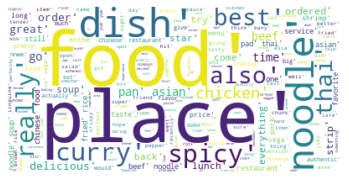

In [226]:
#Text preprocessing
pos = top_words(pos_reviews)
wordcloud = word_cloud(str(pos))

# Generating wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

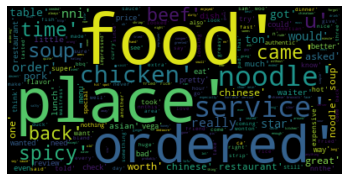

In [227]:
#Text preprocessing
neg = top_words(neg_reviews)
wordcloud = word_cloud_neg(str(neg))

# Generating wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Rating Prediction

In [1]:
import nltk
import pandas as pd
import numpy as np
import random
from nltk.corpus import movie_reviews #2000 movie revies 
import pickle
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import os
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.tokenize import word_tokenize
from nltk.classify import ClassifierI
from statistics import mode
pd.options.display.max_colwidth = 100000
os.chdir('/Users/Diven/Desktop/SMU/Lift & CO/yelp_dataset')
os.getcwd()
import re
from string import punctuation
from nltk.stem import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')

In [61]:

df = pd.read_csv('rating_prediction.csv')
df
#248K

stars  \
0           1   
1           5   
2           1   
3           4   
4           1   
...       ...   
248428      5   
248429      5   
248430      1   
248431      5   
248432      1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.  
1          If you are looking for the best pierogies in Pittsburgh, this is your place. There are a few small tables outside but most of the business is carry out. Pierogies Plus wins Best Pierogies every year. Why? Because the owner is from Poland and she is making the real deal pierogies. The best part is that they are hand pinched by a group of older Polish and Hungarian women. \nThe biggest seller is potato and cheese but they sell many flavors. They are like plump pillows of softness. You can buy them buy the dozen. You can get them cold to take home and freeze or warm and ready to eat. The warm ones are served with butter and onions.  It's definitely a comfort food. The best part is that they ship internationally. Yes, they are that good.  
2       Met a friend for dinner there tonight. The server only brought us one menu. After she brought us a couple of Cokes she didn't come to our table for 20 mins. After trying to get her attention a few times when she walked by we decided to just order off the bartender. We received the starters and the mains at the same time. The wings, brisket, and mac and cheese were alright at best. At this point we hadn't seen the server since she brought the food, so we had to go to the bar for more napkins and refills on the Cokes. The most we actually saw our server was when she hovered over us as we put the tip into the handheld credit card terminal. \n\nFood was somewhere between okay and decent. Service was somewhere between piss poor and terrible.  
3                                                                                                                                                                So good! They didn't make it to 5 stars due to the prices are a bit high for the amount of food and the location is a bit unsavory. \nThe decor and atmosphere was surprisingly nice, from the outside I expected to be more run down inside. The staff was very nice. We were surprised how empty the dining room was for a Friday evening.\nWe got Vegetable Samosas to start then ordered Chicken Tikka Masala, Lamb Rogan Josh, rice and plain Naan. Our only complaint was the lamb could've been more tender but everything was flavorful and delicious. \nI would definitely go again if given the chance.  
4                 

In [62]:
df = df[:15000]

In [63]:
df['stars'].unique()

array([1, 5, 4, 3, 2])

In [12]:
temp = df[df['stars'] == 1]
del temp['stars']
temp = temp.to_numpy()
np.savetxt('one.txt', temp, fmt='%s') 

temp = df[df['stars'] == 2]
del temp['stars']
temp = temp.to_numpy()
np.savetxt('two.txt', temp, fmt='%s') 

temp = df[df['stars'] == 3]
del temp['stars']
temp = temp.to_numpy()
np.savetxt('three.txt', temp, fmt='%s') 

temp = df[df['stars'] == 4]
del temp['stars']
temp = temp.to_numpy()
np.savetxt('four.txt', temp, fmt='%s') 

temp = df[df['stars'] == 5]
del temp['stars']
temp = temp.to_numpy()
np.savetxt('five.txt', temp, fmt='%s') 


In [67]:
one = open("one.txt","r").read()
two = open("two.txt","r").read()
three = open("three.txt","r").read()
four = open("four.txt","r").read()
five = open("five.txt","r").read()

In [68]:
documents = []
for r in one.split('\n'):
    documents.append((r,"1"))
    
for r in two.split('\n'):
    documents.append((r,"2"))
    
for r in three.split('\n'):
    documents.append((r,"3"))
    
for r in four.split('\n'):
    documents.append((r,"4"))
    
for r in five.split('\n'):
    documents.append((r,"5"))

In [69]:
from nltk.tokenize import word_tokenize
all_words = []

one = word_tokenize(one)
two = word_tokenize(two)
three = word_tokenize(three)
four = word_tokenize(four)
five = word_tokenize(five)

for w in one:
    all_words.append(w.lower())
    
for w in two:
    all_words.append(w.lower())
    
for w in three:
    all_words.append(w.lower())
    
for w in four:
    all_words.append(w.lower())
    
for w in five:
    all_words.append(w.lower())

In [39]:
def clean_text(reviews):

    #LOWER
    def to_lower(text):
        return ' '.join([w.lower() for w in nltk.word_tokenize(text)])

    lower = to_lower(reviews)

    #Cleaning
    cleaned_text = re.sub('<[^<]+?\\>','', lower)
    cleaned_text = ''.join(c for c in cleaned_text if not c.isdigit())
    cleaned_text

    def strip_punctuation(s):
        return ''.join(c for c in s if c not in punctuation)

    cleaned_text = strip_punctuation(cleaned_text)

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append("definitely")
    stopwords.append("nt")
    stopwords.append("like")
    stopwords.append("get")
    stopwords.append("mi")
    stopwords.append("thought")

    stop_words = set(stopwords)
    word_tokens = nltk.word_tokenize(cleaned_text)

    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in filtered_sentence]
    return (lemmatized_word)

In [66]:
all_words = clean_text(str(all_words))

#len(all_words) #1840154 -  776903

In [70]:
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:3000]

In [47]:
#can do POS tagging
#]len(documents)
#documents[967807]

58026

In [71]:
def find_features(document):
    words = word_tokenize(document) 
    features = {}
    for w in word_features:
        features[w] = (w in words) 
    
    return features


documents = documents[:15000]

random.shuffle(featuresets)
featuresets = [(find_features(rev), category) for(rev, category) in documents]

random.shuffle(featuresets)


In [72]:
#10,664 approx
training_set = featuresets[:10000]
testing_set = featuresets[10000:] 

In [75]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    

## Model execution

In [76]:

classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Naive Bayes Algo accuracy:", (nltk.classify.accuracy(classifier, testing_set ))*100)


Naive Bayes Algo accuracy: 56.39999999999999


In [78]:

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set ))*100)


BernoulliNB_classifier accuracy: 57.379999999999995


In [74]:

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set ))*100)


LogisticRegression_classifier accuracy: 78.24


In [79]:

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set ))*100)


SGDClassifier_classifier accuracy: 76.55999999999999


In [80]:

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC_classifier accuracy:", (nltk.classify.accuracy(SVC_classifier, testing_set ))*100)


SVC_classifier accuracy: 79.0


In [29]:

voted_classifier = VoteClassifier(classifier,
                                  BernoulliNB_classifier, 
                                  LogisticRegression_classifier,
                                  SGDClassifier_classifier,
                                  SVC_classifier)

print("voted_classifier accuracy:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)



voted_classifier accuracy: 78.74


In [6]:

save_documents = open("documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()

save_word_features = open("word_features3k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

save_featuresets = open("featuresets.pickle","wb")
pickle.dump(featuresets, save_featuresets)
save_featuresets.close()


#Saving all the classifier so that we do not train the model every time
save_classifier = open("naivebayes.pickle","wb")
pickle.dump(classifier, save_classifier)

save_classifier = open("BernoulliNB_classifier.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)

save_classifier = open("LogisticRegression_classifier.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)

save_classifier = open("SGDClassifier_classifier.pickle","wb")
pickle.dump(SGDClassifier_classifier, save_classifier)

save_classifier = open("SVC_classifier.pickle","wb")
pickle.dump(SVC_classifier, save_classifier)

save_classifier.close()


'\nsave_documents = open("documents.pickle","wb")\npickle.dump(documents, save_documents)\nsave_documents.close()\n\nsave_word_features = open("word_features3k.pickle","wb")\npickle.dump(word_features, save_word_features)\nsave_word_features.close()\n\nsave_featuresets = open("featuresets.pickle","wb")\npickle.dump(featuresets, save_featuresets)\nsave_featuresets.close()\n\n\n#Saving all the classifier so that we do not train the model every time\nsave_classifier = open("naivebayes.pickle","wb")\npickle.dump(classifier, save_classifier)\n\nsave_classifier = open("MNB_classifier.pickle","wb")\npickle.dump(MNB_classifier, save_classifier)\n\nsave_classifier = open("BernoulliNB_classifier.pickle","wb")\npickle.dump(BernoulliNB_classifier, save_classifier)\n\nsave_classifier = open("LogisticRegression_classifier.pickle","wb")\npickle.dump(LogisticRegression_classifier, save_classifier)\n\nsave_classifier = open("SGDClassifier_classifier.pickle","wb")\npickle.dump(SGDClassifier_classifier, 

# Restaurant Recommender System Using Yelp Data


## Importing Required Libraries

In [0]:
!pip install surprise
import os
import pandas as pd
import numpy as np
from surprise import Reader
from surprise import Dataset
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import SVD
from surprise import NMF
from surprise import accuracy
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict

## Pre-Processing

### Reading Data

In [0]:
#Ratings_all, las_vegas_rest_id, las_vegas, business_unique
from google.colab import files
uploaded = files.upload()

Saving ratings_all.csv to ratings_all.csv


In [0]:
import io
import pandas as pd
ratings_all = pd.read_csv(io.BytesIO(uploaded['ratings_all.csv']))

test = pd.read_csv(io.BytesIO(uploaded['las_vegas_rest_id.csv']))
test.columns = ["item_id"]

business_unique = pd.read_csv(io.BytesIO(uploaded['business_unique.csv']))

las_vegas = pd.read_csv(io.BytesIO(uploaded['las_vegas.csv']))

### Top 5 rows

In [0]:
ratings_all.head()

user_id  item_id  rating
0    82912    66583     1.0
1    11682    27012     5.0
2   104738    56942     1.0
3    27169    33582     4.0
4    95543    30728     1.0

### Checking null values

In [0]:
print(ratings_all.isnull().sum())

user_id    0
item_id    0
rating     0
dtype: int64


### converting into dictionary format

In [0]:
ratings_dict = {'itemID': list(ratings_all.item_id),
                'userID': list(ratings_all.user_id),
                'rating': list(ratings_all.rating)}

df = pd.DataFrame(ratings_dict)
print(df.shape)

(248433, 3)


## EDA

### Plotly-Function

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Ratings Distribution

In [0]:
configure_plotly_browser_state()

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = df['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Number of ratings per item

In [0]:
configure_plotly_browser_state()


data = df.groupby('itemID')['rating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Number of ratings per user

In [0]:
configure_plotly_browser_state()

data = df.groupby('userID')['rating'].count().clip(upper=80)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Surprise!

#### To let surprise library read our data we have to create a reader function and define it's format.
#### Next thing, we have to assign the rating scale we will be working with.
#### Lastly, we  have to call "Dataset.load_from_df" and pass dataframe and reader class object.

In [0]:
reader = Reader(line_format='user item rating', sep='\t')

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)



### Model Selection

We will be comparing **SVD, NMF, Normal Predictor, KNN Basic** and will be using the one which will have least RMSE value.

Some understanding on the algorithms before we start applying.

**1: Normal Predictor:** It predicts a random rating based on the distribution of the training set, which is assumed to be normal.
It's a basic algorithm that does not do much work but that is still useful for comparing accuracies.

**2: SVD:** It got popularized by Simon Funk during the Netflix prize and is a Matrix Factorized algorithm. If baselines are not used, it is equivalent to PMF.

**3: NMF:** It is based on Non-negative matrix factorization and is similar to SVD.

**4: KNN Basic:** This is a basic collaborative filtering algorithm method.

<font color=red> We will use __RMSE__ as our accuracy metric for the predictions. </font>

In [0]:
#data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
    benchmark.append(tmp)

                     

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [0]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

test_rmse   fit_time  test_time
Algorithm                                       
SVD               1.364049   2.426933   0.234833
KNNBasic          1.584446  11.777577   0.176995
NMF               1.600081   5.274580   0.120478
NormalPredictor   2.040164   0.069065   0.264941

### As we see, SVD outperforms and provides the best by having the least RMSE value and  test_time.
### Tweaking parameters may make our model better and so we are using "GridSearchCv" to check which combination of the parameters will be best for our model.

**Default values for svd( ):**

**n_factors**  - 100   
**n_epochs**  - 20   
**lr_all**  – 0.005   
**reg_all**   – 0.02 

In [0]:
#Default parameters are 

param_grid = {'n_factors': [25, 30, 35, 40], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']


### Time to run the model

In [0]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD(n_factors=factors, n_epochs=epochs, lr_all=lr_value, reg_all=reg_value)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 1.3338


1.3337955489261741

### Let's check how good or bad our predictions are:
The following function will create a pandas data frame which will consist of these columns:

**UID:** user-id

**iid:** item id

**Rui:** the rating given by the user

**est:** rating estimated by the model

**Iu:** No of items rated by the user

**UI:** number of users that have rated this item

**err:** abs difference between predicted rating and the actual rating.


In [0]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: 
        return 0
    
def get_Ui(iid):

    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [0]:
df_predictions.head()

uid    iid  rui       est                    details  Iu  Ui       err
0  28733  59721  1.0  3.061131  {'was_impossible': False}   1   0  2.061131
1  70364  56624  5.0  3.393980  {'was_impossible': False}   7   2  1.606020
2  94026  60229  5.0  3.249678  {'was_impossible': False}   0   0  1.750322
3  90381  71527  1.0  1.460990  {'was_impossible': False}   0  10  0.460990
4  22847  33971  4.0  3.869923  {'was_impossible': False}  11   5  0.130077

In [0]:

best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

In [0]:
best_predictions

uid    iid  rui  est                    details   Iu  Ui  err
36337   94673  69142  1.0  1.0  {'was_impossible': False}    2  23  0.0
46386   53691   6049  5.0  5.0  {'was_impossible': False}   24  68  0.0
28114    5691  58653  5.0  5.0  {'was_impossible': False}  234  53  0.0
14379   79183  31282  1.0  1.0  {'was_impossible': False}    2  35  0.0
19945   40068  13287  5.0  5.0  {'was_impossible': False}   84  19  0.0
53869   94727  54291  5.0  5.0  {'was_impossible': False}   26  17  0.0
17608   63247  28624  5.0  5.0  {'was_impossible': False}   50  23  0.0
45691   91643  20710  1.0  1.0  {'was_impossible': False}    2  14  0.0
14395   33646  50788  5.0  5.0  {'was_impossible': False}    6  78  0.0
39998  115105  36495  5.0  5.0  {'was_impossible': False}   30  11  0.0

In [0]:
worst_predictions

uid    iid  rui       est                    details  Iu  Ui       err
26106  18414  23776  5.0  1.011713  {'was_impossible': False}   3  15  3.988287
5152    5326  21104  5.0  1.000000  {'was_impossible': False}   3   7  4.000000
31674   7300  18365  5.0  1.000000  {'was_impossible': False}   6   6  4.000000
57827  78058  28992  5.0  1.000000  {'was_impossible': False}   2   8  4.000000
7517   91532   6887  5.0  1.000000  {'was_impossible': False}   1  22  4.000000
50092  87612  28068  1.0  5.000000  {'was_impossible': False}   7  59  4.000000
39200  80468  11769  5.0  1.000000  {'was_impossible': False}   1  22  4.000000
45809  98241  65451  1.0  5.000000  {'was_impossible': False}  13  13  4.000000
20351  99937  34240  1.0  5.000000  {'was_impossible': False}   8   3  4.000000
48627  83629   6164  1.0  5.000000  {'was_impossible': False}  19   3  4.000000

In [0]:
df.loc[df['userID'] == 83629]['rating'].describe()

count    27.000000
mean      4.111111
std       1.625123
min       1.000000
25%       4.500000
50%       5.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

In [0]:
df.loc[df['itemID'] == 6164]['rating'].describe()

count    7.000000
mean     4.000000
std      1.414214
min      1.000000
25%      4.000000
50%      4.000000
75%      5.000000
max      5.000000
Name: rating, dtype: float64

In [0]:
temp = df.loc[df['itemID'] == 6164]['rating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 6164 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## K recommendations

### Recall and precision at K
Recall and precision are the classical evaluation metric and are used to evaluate the binary metric and so we have to convert our rating which is scaled from (1-5) into a binary problem relevant and not relevant items.

### Conversion to binary
To do the translation we have to select an arbitrary value on which we can say any rating above that will be considered relevant. There are many methods on selecting that value but for now, we will select 3.5 as the threshold, which means any true rating above 3.5 will be considered relevant and below will be not relevant.

### Deciding 'k'
In recommendation systems, we are interested in showing the top N items to users and so the best is to compute precision and recall on top N values instead of calculating on all the items.


### Definition of Relevant and Recommended

**Relevant:** True Rating > = 3.5

**Irrelevant:** True Rating < 3.5
***
**Recommended item:** Predicted Rating > = 3.5

**Not Recommended item:** Predicted Rating > = 3.5

Definition of Precision and Recall
**Precision:** It tries to answer "What proportion of positive identifications was actually correct?"
i.e True positive / (True positive+False Positive)
in RecSys we can say (# of recommended items @k that are relevant) / (# of recommended items @k)

**Recall:** It tries to answer "What proportion of actual positives were identified correctly?"
i.e True positive / (True Positive+False Negative)
in RecSys we can say (# of recommended items @k that are relevant) / (# of relevant items @k)


**While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.**

In some circumstances, we might know that we need to maximize either **recall** or **precision** at the cost of the other metric. For example, in disease screening of patients, we would probably want a recall near 1.0 i.e. we want to find all patients who have the disease. 

However, in cases where we want to obtain an optimal blend of precision and recall, we can use **F1** score which is the harmonic mean of precision and recall taking both metrics into account while calculating it.

**f1 score = 2 * (precision * recall) / (precision + recall)**

In [0]:
def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    
    return precisions, recalls
    
    


In [0]:

results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results



[{'K': 2, 'Precision': 0.9244505137209, 'Recall': 0.778637856894718},
 {'K': 3, 'Precision': 0.9236701781766169, 'Recall': 0.786165422345918},
 {'K': 4, 'Precision': 0.9232756752070065, 'Recall': 0.7900013438736777},
 {'K': 5, 'Precision': 0.9228985130272692, 'Recall': 0.7921751267069932},
 {'K': 6, 'Precision': 0.9226236615077822, 'Recall': 0.7935630143985253},
 {'K': 7, 'Precision': 0.9224576853761407, 'Recall': 0.7945879645572729},
 {'K': 8, 'Precision': 0.9223787228508263, 'Recall': 0.795401716214502},
 {'K': 9, 'Precision': 0.9222941865001955, 'Recall': 0.7960056820097191},
 {'K': 10, 'Precision': 0.9222187540642481, 'Recall': 0.7964604661827288}]

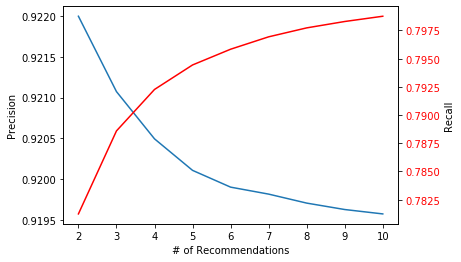

In [0]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')
    ###

As the graph states, Precision drops significantly when K=4

So we will consider the value of K to be 4.

## Time to recommend some restaurants

In [0]:
user_id = 53691
test['user_id'] = user_id
cols = ['user_id', 'item_id','rating']
test['rating'] = 0
test = test[cols]

In [0]:
ratings_dict = {'itemID': list(test.item_id),
                'userID': list(test.user_id),
                'rating': list(test.rating)}

df = pd.DataFrame(ratings_dict)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=1.0)

In [0]:
test_predictions = algo.test(testset)

In [0]:
test_predictions[:20]

[Prediction(uid=53691, iid=20692.0, r_ui=0.0, est=3.969123632242155, details={'was_impossible': False}),
 Prediction(uid=53691, iid=30412.0, r_ui=0.0, est=3.6734077232303752, details={'was_impossible': False}),
 Prediction(uid=53691, iid=42821.0, r_ui=0.0, est=4.377861198401289, details={'was_impossible': False}),
 Prediction(uid=53691, iid=57007.0, r_ui=0.0, est=3.957632258686623, details={'was_impossible': False}),
 Prediction(uid=53691, iid=63008.0, r_ui=0.0, est=4.073969349027424, details={'was_impossible': False}),
 Prediction(uid=53691, iid=54670.0, r_ui=0.0, est=4.330987820154285, details={'was_impossible': False}),
 Prediction(uid=53691, iid=13527.0, r_ui=0.0, est=5, details={'was_impossible': False}),
 Prediction(uid=53691, iid=14366.0, r_ui=0.0, est=3.8762341847803885, details={'was_impossible': False}),
 Prediction(uid=53691, iid=26842.0, r_ui=0.0, est=4.328966480192107, details={'was_impossible': False}),
 Prediction(uid=53691, iid=26608.0, r_ui=0.0, est=4.061053388145644, 

In [0]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    # Then sort the predictions for each user    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [0]:
all_pred = get_all_predictions(test_predictions)

In [0]:
#To get top 10 reommendation
n = 10
for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]


In [0]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()
results = tmp_transpose.loc[user_id]

In [0]:
recommended_rest_ids=[]
for x in range(0, n):
    recommended_rest_ids.append(results[x][0])

recommended_rest_ids


[13527.0,
 14495.0,
 69928.0,
 17830.0,
 2115.0,
 71939.0,
 37284.0,
 68470.0,
 61845.0,
 29494.0]

In [0]:
business_unique.head()

business_id     item
0  tstimHoMcYbkSC4eBA1wEg  65606.0
1  kANF0dbeoW34s2vwh6Umfw  54757.0
2  YK5eFV8uS1bCmp8GeiQ-Qg  40270.0
3  sKhDrZFCJqfRNylkHrIDsQ  63871.0
4  6fPQJq4f_yiq1NHn0fd11Q   8737.0

In [0]:
recommendations = business_unique[business_unique['item'].isin(recommended_rest_ids)]

In [0]:
recommendations['business_id']

221     Os1n1_idfw9vv9kwULGJnQ
1377    wPGjrXl1W0Bb8m2L7nBAew
1763    zRqi6L1u-YmmVAHjeUbGMQ
2005    AtD6B83S4Mbmq0t7iDnUVA
3379    BjPph9SbmEfox2vip326PQ
3385    xfzDtGxx6B4a27RAyah69w
3741    Ec9CBmL3285XkeHaNp-bSQ
4109    qUSisWf5QNIMk8aeVhwKjA
4624    VeiL_tgw7dsl-7IcnOsh0g
4936    0q_BHpxbikVtPRRLRu-U0g
Name: business_id, dtype: object

In [0]:
las_vegas.head()

business_id  ...                                         categories
0  PZ-LZzSlhSe9utkQYU8pFg  ...                               Restaurants, Italian
1  tstimHoMcYbkSC4eBA1wEg  ...  Mexican, Restaurants, Patisserie/Cake Shop, Fo...
2  kANF0dbeoW34s2vwh6Umfw  ...  Fast Food, Food, Restaurants, Ice Cream & Froz...
3  YK5eFV8uS1bCmp8GeiQ-Qg  ...                                       Food, Donuts
4  X8mtoSxY8whtmbDlj0D3Aw  ...                               Restaurants, Chinese

[5 rows x 7 columns]

In [0]:
recommendations = las_vegas[las_vegas['business_id'].isin(recommendations['business_id'])]

In [0]:
recommendations 

business_id  ...                                         categories
383   Os1n1_idfw9vv9kwULGJnQ  ...  Restaurants, Japanese, Hawaiian, Korean, Asian...
2224  wPGjrXl1W0Bb8m2L7nBAew  ...                      Vietnamese, Soup, Restaurants
2830  zRqi6L1u-YmmVAHjeUbGMQ  ...  Food, Restaurants, Breakfast & Brunch, Juice B...
3190  AtD6B83S4Mbmq0t7iDnUVA  ...  Chinese, Restaurants, Vegetarian, Specialty Fo...
5347  BjPph9SbmEfox2vip326PQ  ...  Local Flavor, Sports Bars, Event Planning & Se...
5354  xfzDtGxx6B4a27RAyah69w  ...  Korean, Food, Breakfast & Brunch, Restaurants,...
5927  Ec9CBmL3285XkeHaNp-bSQ  ...  Asian Fusion, Bars, Sports Bars, Vietnamese, S...
6510  qUSisWf5QNIMk8aeVhwKjA  ...  Food, Vegan, Bakeries, Desserts, Breakfast & B...
7313  VeiL_tgw7dsl-7IcnOsh0g  ...                  Restaurants, Japanese, Sushi Bars
7829  0q_BHpxbikVtPRRLRu-U0g  ...  Bars, Mediterranean, Chinese, Spanish, Nightli...

[10 rows x 7 columns]